### Explore Bike Share Data

For this project, my goal was to ask and answer three questions about bikeshare data from Washington, Chicago, and New York City using R.

In [1]:
# Import libraries
library(ggplot2)
library(lubridate)
library(dplyr)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date


Attaching package: ‘dplyr’

The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
# Read in the data for each city
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [3]:
# Visual check of the New York City dataframe 
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [4]:
# Visual check of the Washington dataframe 
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [5]:
# Visual check of the Chicago dataframe 
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


In [6]:
# How many rows and columns are in each dataset?
print(dim(ny))
print(dim(wash))
print(dim(chi))

[1] 54770     9
[1] 89051     7
[1] 8630    9


In [7]:
# Total records in all three datasets
print(dim(ny)[1]+dim(wash)[1]+dim(chi)[1])

[1] 152451


In [8]:
# Add Gender and Birth.Year columns to wash so it can be concatenated with the other cities
wash$Gender = c(NA)
wash$Birth.Year = c(NA)

In [9]:
# Add city column to each table
ny$city = c('new_york_city')
wash$city = c('washington')
chi$city = c('chicago')

In [10]:
# Combine all datasets into one called all_cities
all_cities = rbind(ny, wash, chi)

# Compare to earlier calculation--we should have 152,151 rows
dim(all_cities)

[1] 152451     10

In [11]:
# Veiw summary data for combined dataset
summary(all_cities)

       X                         Start.Time                    End.Time     
 Min.   :      7   2017-02-19 12:19:00:     6   2017-03-09 17:54:00:     7  
 1st Qu.: 589310   2017-02-20 11:35:00:     6   2017-03-28 18:11:00:     7  
 Median :1184899   2017-02-24 17:46:00:     6   2017-01-13 17:48:00:     6  
 Mean   :1781625   2017-03-01 08:20:00:     6   2017-01-31 08:49:00:     6  
 3rd Qu.:2085970   2017-03-02 08:39:00:     6   2017-02-13 18:09:00:     6  
 Max.   :6816152   2017-03-09 17:31:00:     6   2017-02-20 11:38:00:     6  
                   (Other)            :152415   (Other)            :152413  
 Trip.Duration                                  Start.Station   
 Min.   :     60   Columbus Circle / Union Station     :  1700  
 1st Qu.:    392   Lincoln Memorial                    :  1546  
 Median :    667   Jefferson Dr & 14th St SW           :  1488  
 Mean   :   1098   Massachusetts Ave & Dupont Circle NW:  1219  
 3rd Qu.:   1159   Jefferson Memorial                  :  1

### Question 1


What is the average trip duration for each city? For all cities?

In [12]:
# View summary information for Trip Duration for each city
by(all_cities$Trip.Duration, all_cities$city, summary)

all_cities$city: chicago
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   60.0   394.2   670.0   937.2  1119.0 85408.0 
------------------------------------------------------------ 
all_cities$city: new_york_city
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
     61.0     368.0     610.0     903.6    1051.0 1088634.0         1 
------------------------------------------------------------ 
all_cities$city: washington
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
    60.3    410.9    707.0   1234.0   1233.2 904591.4        1 

In [13]:
# View summary information for Trip Duration for all cities combined
summary(all_cities$Trip.Duration)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
     60     392     667    1098    1159 1088634       2 

In [14]:
# Remove outliers
# Start by finding the standard deviation
duration_sd = sd(all_cities$Trip.Duration, na.rm = TRUE)
duration_sd

[1] 5343.223

In [15]:
duration_mean = mean(all_cities$Trip.Duration, na.rm = TRUE)
duration_mean

[1] 1098.475

In [16]:
duration_top = duration_mean + duration_sd
duration_top

[1] 6441.698

In [17]:
# filter out trip durations larger than 1 standard deviation above the mean 
# and remove NA values
duration_filter = subset(all_cities, Trip.Duration <= duration_top & !is.na(Trip.Duration))

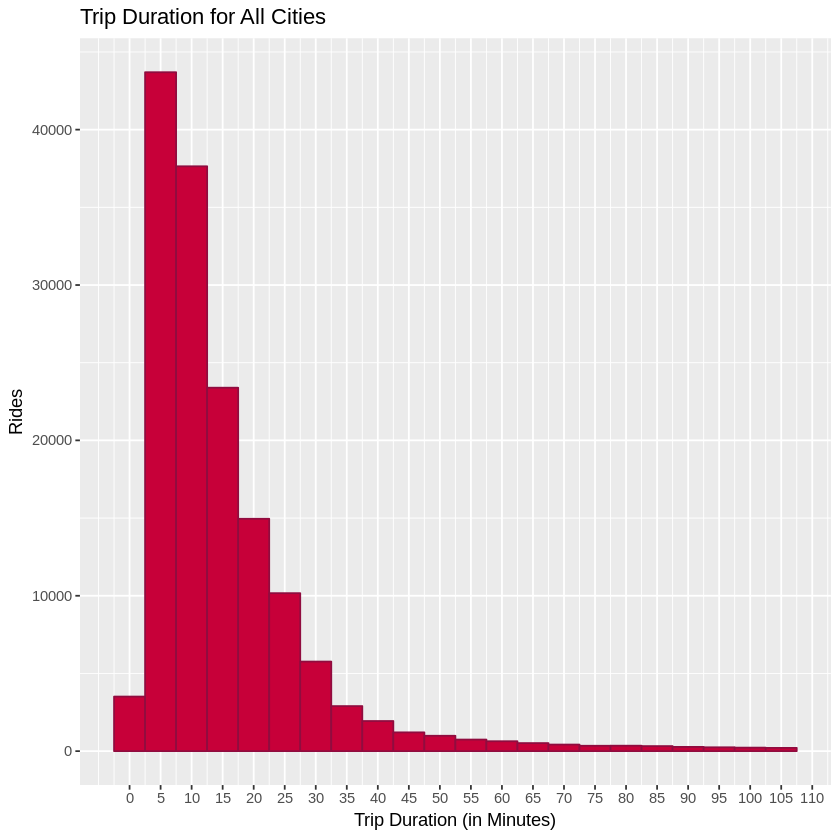

In [18]:
# visualize trip duration in minutes (divide Trip.Duration by 60)
ggplot(duration_filter, aes(x=Trip.Duration/60)) + 
geom_histogram(binwidth=5, fill = '#C70039', color = '#900C3F') +
labs(title = "Trip Duration for All Cities", x = "Trip Duration (in Minutes)", y = "Rides") +
scale_x_continuous(breaks = seq(0, duration_top, 5))

**Summary of your question 1 results:**

The average trip length is between 10 and 20 minutes. The most common trip duration is less than 10 minutes, and the majority of all trips are less than 30 minutes.

### Question 2

Which days of the week are popular with subscribers and with single-ride customers?

In [19]:
# Convert Start.Time from string to datetime
all_cities$Start.DateTime = ymd_hms(all_cities$Start.Time)

In [20]:
# Create Day.of.Week column
all_cities$Day.of.Week = wday(all_cities$Start.DateTime, label=TRUE)

In [21]:
# filter out blank User.Type values
usertype_filter = subset(all_cities, User.Type != '')

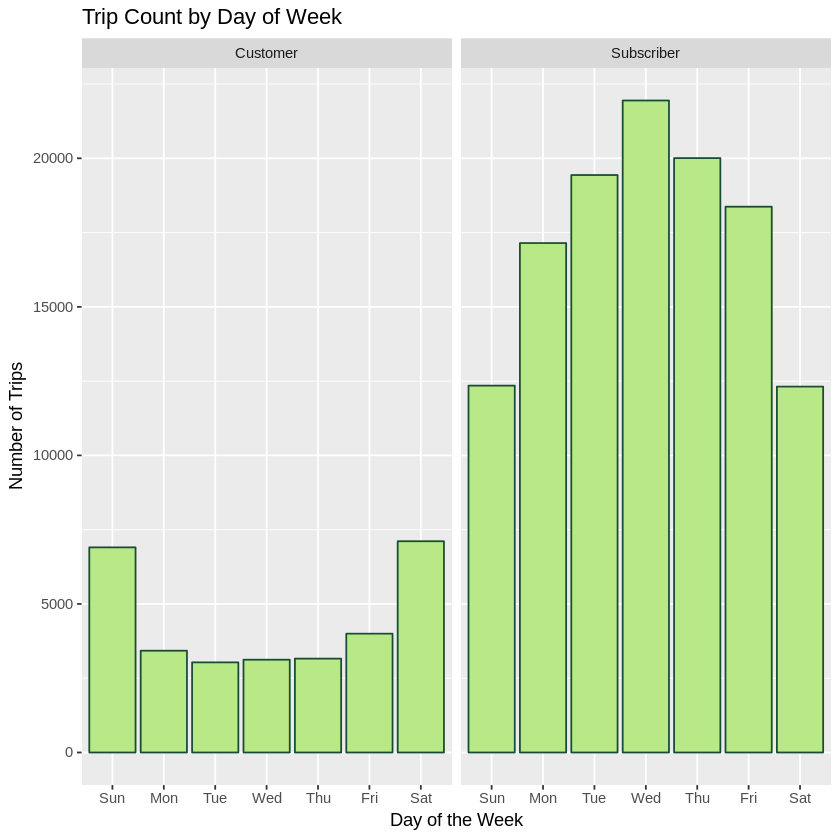

In [22]:
# Visualize count of trips on each day of the week, separated by User.Type
ggplot(usertype_filter, aes(x=usertype_filter$Day.of.Week)) + 
geom_bar(fill = '#b8e986', color = '#194d33') +
labs(title = "Trip Count by Day of Week", x = "Day of the Week", y = "Number of Trips") +
facet_wrap(~User.Type)

**Summary of your question 2 results:**

Subcribers take more rides on weekdays than on weekends. The day with the most rides for subscribers is Wednesday.

Single-ride customers take more rides on the weekend, Saturday and Sunday. Fridays have the highest non-weekend day ride count for single-ride customers.

### Question 3

Which day has the most rentals for each city? Which times of the year are more popular for rentals?

In [23]:
# Convert Start.DateTime column to date
all_cities$Start.Date = as.Date(all_cities$Start.DateTime)

In [24]:
# Group by date to count rides per day in each city
# Source: https://datascience.stackexchange.com/questions/77040/r-counting-the-number-of-observations-per-category

rides_per_day_by_city = all_cities %>% 
group_by(Start.Date, city) %>% 
summarise(ride_count = n())
print(rides_per_day_by_city)

# A tibble: 540 x 3
# Groups:   Start.Date [?]
   Start.Date city          ride_count
   <date>     <chr>              <int>
 1 2017-01-01 chicago               14
 2 2017-01-01 new_york_city        138
 3 2017-01-01 washington           220
 4 2017-01-02 chicago               15
 5 2017-01-02 new_york_city         74
 6 2017-01-02 washington            80
 7 2017-01-03 chicago               37
 8 2017-01-03 new_york_city        120
 9 2017-01-03 washington           195
10 2017-01-04 chicago               22
# … with 530 more rows


In [25]:
# Return the row with the max value for each city
# Source: https://www.statology.org/maximum-value-by-group-r/

rides_per_day_by_city %>%
group_by(city) %>%
slice(which.max(ride_count))

Start.Date,city,ride_count
2017-06-10,chicago,113
2017-06-09,new_york_city,553
2017-04-15,washington,858


Warning message:
“Removed 1 rows containing non-finite values (stat_count).”

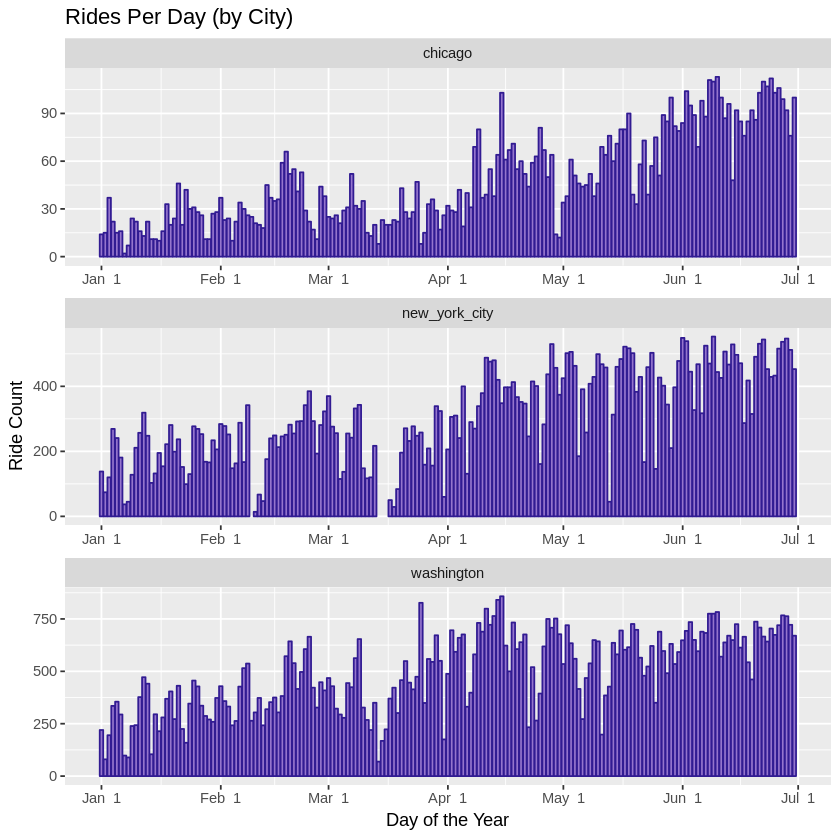

In [26]:
# Visualize rentals per day to see patterns/seasons
ggplot(all_cities, aes(Start.Date)) + 
geom_bar(color = '#311b92', fill = '#9575cd') +
labs(title = "Rides Per Day (by City)", x = "Day of the Year", y = "Ride Count") +
facet_wrap(~city, ncol=1, scale="free") +
scale_x_date(date_breaks = "1 month", date_labels = "%b %e")

**Summary of your question 3 results:**

Interestingly, the day with the most rentals for Chicago and New York City was only one day apart: June 10 for Chicago and June 9 for New York City. Washington, D.C.'s most popular day was April 15.

Viewing the bar charts for each city allows us to see that Spring months at the end of the dataset, which presumably have better weather for biking, have more rentals than Winter months at the beginning of the dataset.